<a href="https://colab.research.google.com/github/madhavjk/DataScience-ML_and_DL/blob/main/SESSION_20_(Decision_trees_and_Random_Forests).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage

In [ ]:
with h5py.File('train_signs.h5', 'r') as hdf:
    ls = list(hdf.keys())
    print(ls)
    train_set_x = np.array(hdf.get('train_set_x'))
    train_set_y = np.array(hdf.get('train_set_y'))

print(train_set_x.shape)
print(train_set_y.shape)

['list_classes', 'train_set_x', 'train_set_y']
(1080, 64, 64, 3)
(1080,)


In [ ]:
with h5py.File('test_signs.h5', 'r') as hdf:
    ls = list(hdf.keys())
    print(ls)
    test_set_x = np.array(hdf.get('test_set_x'))
    test_set_y = np.array(hdf.get('test_set_y'))
    
print(test_set_x.shape)
print(test_set_y.shape)

['list_classes', 'test_set_x', 'test_set_y']
(120, 64, 64, 3)
(120,)


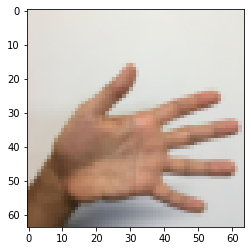

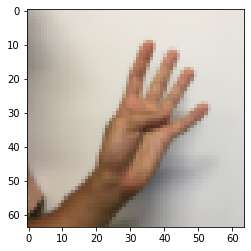

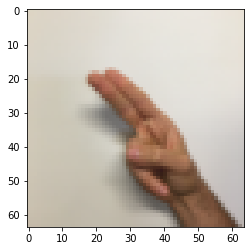

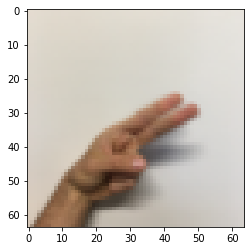

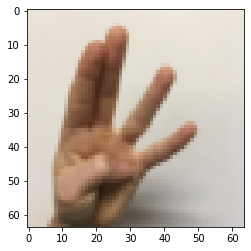

In [ ]:
plt.figure()
plt.imshow(train_set_x[0])
plt.figure()
plt.imshow(train_set_x[5])
plt.figure()
plt.imshow(train_set_x[14])
plt.figure()
plt.imshow(train_set_x[2])
plt.figure()
plt.imshow(train_set_x[9])

In [ ]:
print(train_set_y[0])
print(train_set_y[5])
print(train_set_y[14])
print(train_set_y[2])
print(train_set_y[9])

5
4
2
2
4


In [ ]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
num_px = train_set_x.shape[1]

train_set_y.shape = (1,m_train)
test_set_y.shape = (1,m_test)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 1080
Number of testing examples: m_test = 120
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (1080, 64, 64, 3)
train_set_y shape: (1, 1080)
test_set_x shape: (120, 64, 64, 3)
test_set_y shape: (1, 120)


In [ ]:
# Reshape the training and test examples
# Each column represents a flattened image
# There are total m columns for m images

train_set_x_flatten = train_set_x.reshape(num_px*num_px*3, m_train)
test_set_x_flatten = test_set_x.reshape(num_px*num_px*3, m_test)

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 1080)
train_set_y shape: (1, 1080)
test_set_x_flatten shape: (12288, 120)
test_set_y shape: (1, 120)


In [ ]:
x_train = train_set_x_flatten/255.
x_test = test_set_x_flatten/255.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth = 300,min_samples_split = 10,min_samples_leaf = 5)
classifier1.fit(x_train.T,train_set_y.T)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=300,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [ ]:
y_pred1 = classifier1.predict(x_train.T)
y_pred2 = classifier1.predict(x_test.T)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_set_y.T, y_pred1)

0.7490740740740741

In [ ]:
accuracy_score(test_set_y.T, y_pred2)

0.20833333333333334